## Task B: Classification

### 1a) Outliers

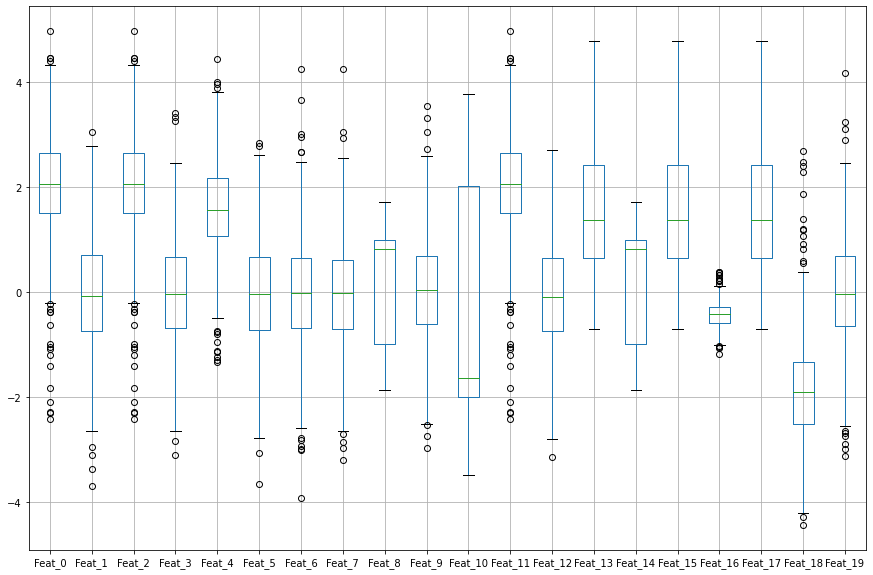

In [3]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

class_data = pd.read_csv('Class.csv') 
boxplot = class_data.boxplot(column=['Feat_0', 'Feat_1', 'Feat_2', 'Feat_3', 'Feat_4', 'Feat_5', 'Feat_6', 'Feat_7', 'Feat_8', 'Feat_9', 'Feat_10', 'Feat_11', 'Feat_12', 'Feat_13', 'Feat_14', 'Feat_15', 'Feat_16', 'Feat_17', 'Feat_18', 'Feat_19'
], figsize=(15,10))

### 1b) Uninformative features

Based on the below correlation matrix, the following features are uninformative:

- Feature 2
- Feature 0
- Feature 16
- Feature 14
- Feature 15
- Feature 10
- Feature 17

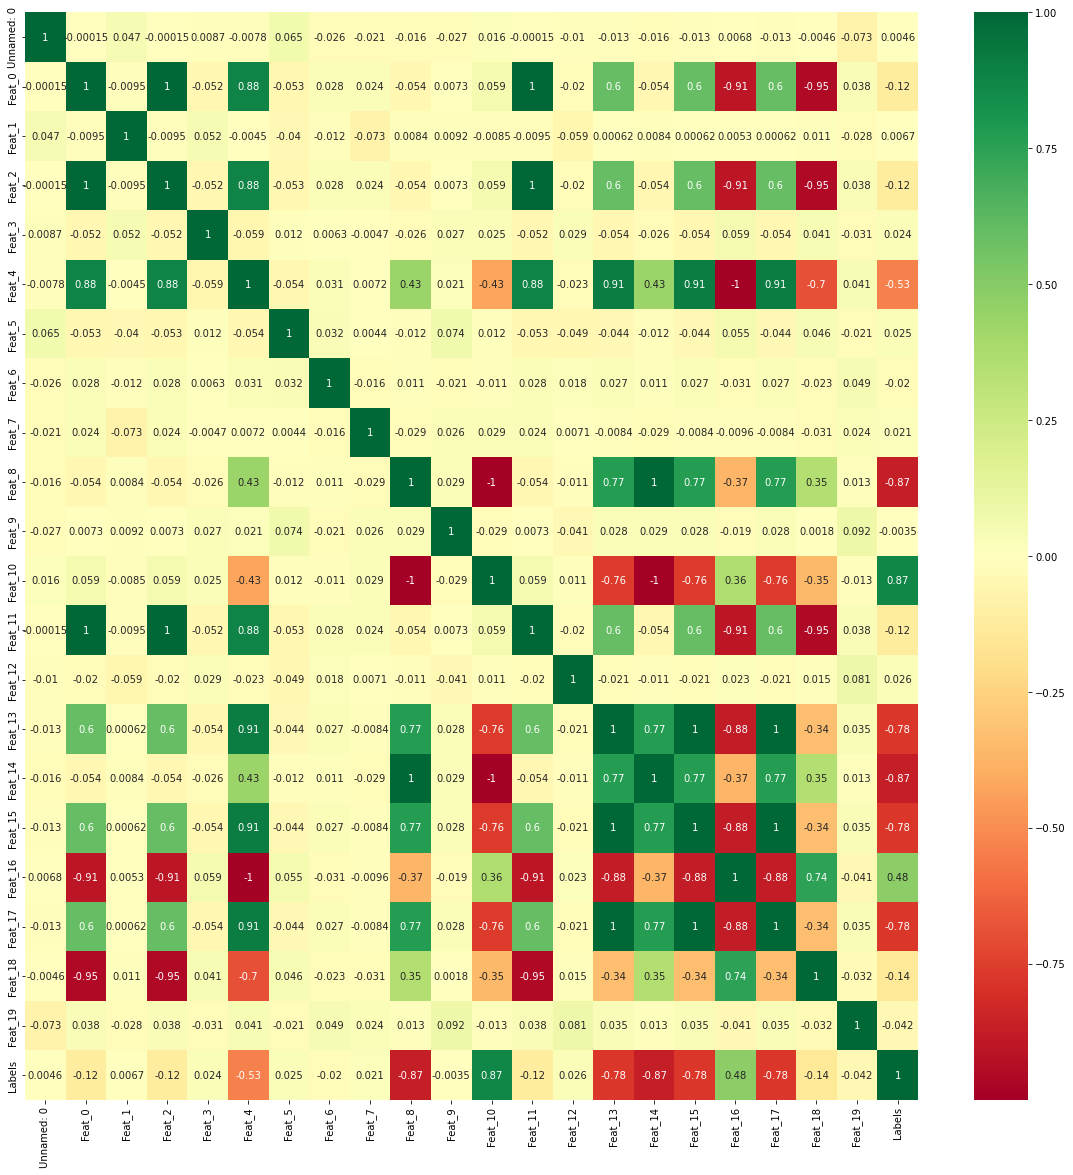

In [5]:
import numpy as np
import seaborn as sn

X = class_data.iloc[1:21]  #independent columns
y = class_data.iloc[:,-1]    #target cbolumn

#get correlations of each features in dataset
corrmat = class_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sn.heatmap(class_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### 1c) Redundant features

[0.00869987 0.00246499 0.0118639  0.00217929 0.02513401 0.00407319
 0.00298578 0.00161205 0.23261625 0.00234311 0.22313138 0.01053267
 0.0029583  0.06278053 0.24917385 0.05682576 0.01583106 0.06672177
 0.01549138 0.00258087]


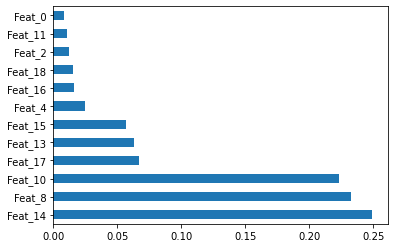

In [6]:
import numpy as np


X = class_data.iloc[:,1:21]  #independent columns
y = class_data.iloc[:,-1]    #target cbolumn

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

### 1d) Imbalance

The below cells show how the data is clearly imbalanced with very few data points available for the label 2

class 0: (405, 22)
class 1: (379, 22)
class 2: (16, 22)


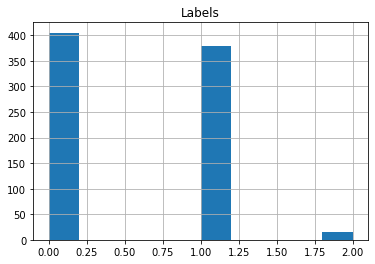

In [7]:
class_data.hist(column='Labels')

# class count
class_count_0, class_count_1, class_count_2 = class_data['Labels'].value_counts()

# Separate class
class_0 = class_data[class_data['Labels'] == 0]
class_1 = class_data[class_data['Labels'] == 1]# print the shape of the class
class_2 = class_data[class_data['Labels'] == 2]

print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
print('class 2:', class_2.shape)

### 2) Visualize the relationship between the informative features and the class labels

Informative features are:
- Feature 1
- Feature 3
- Feature 4
- Feature 5
- Feature 6
- Feature 7
- Feature 8
- Feature 9
- Feature 11
- Feature 12
- Feature 13
- Feature 18
- Feature 19

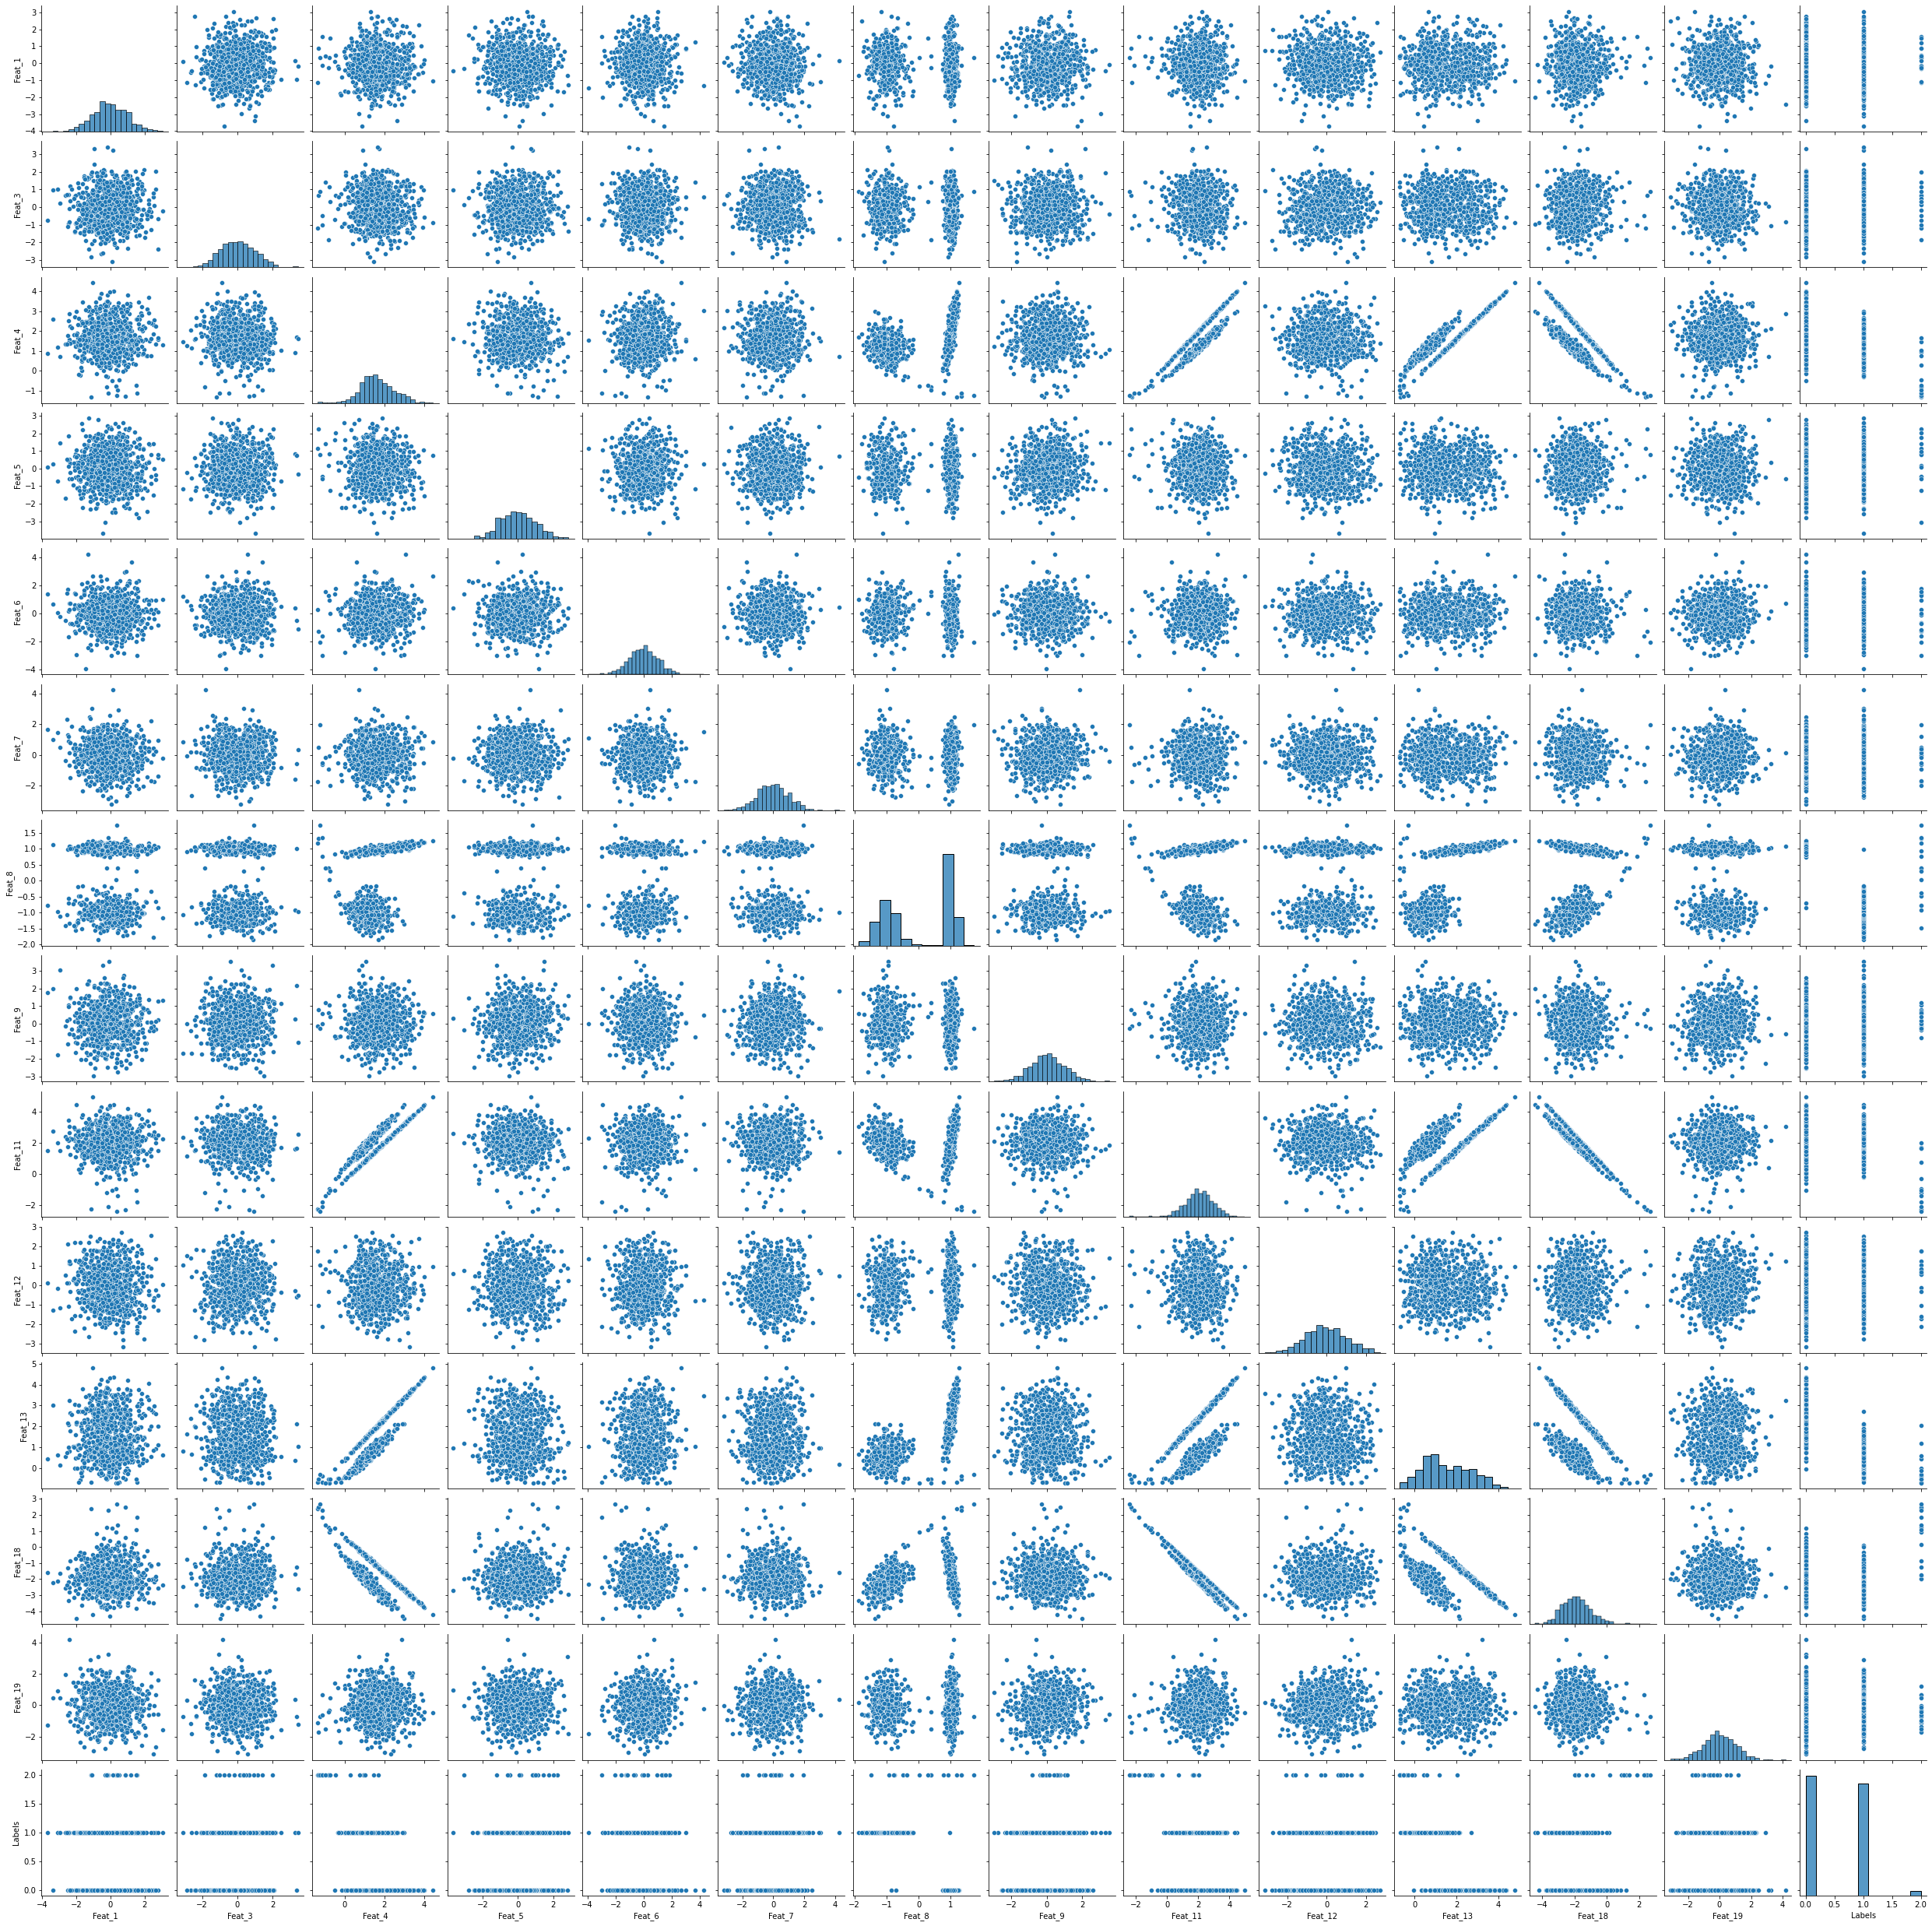

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

info_features = ['Feat_1', 'Feat_3', 'Feat_4', 'Feat_5', 'Feat_6', 'Feat_7', 'Feat_8', 'Feat_9', 'Feat_11', 'Feat_12', 'Feat_13','Feat_18', 'Feat_19', 'Labels']

#create pairs plot
sn.pairplot(class_data[info_features])

### 3) Train a classifier to predict the labels from the provided features, assuming that each type of
misclassification error is equally costly. Clearly label each step of the process wrt your findings
from 1 above.

In [9]:
#Selecting Features
feature_cols = ['Feat_0', 'Feat_1', 'Feat_2', 'Feat_3', 'Feat_4', 'Feat_5', 'Feat_6', 'Feat_7', 'Feat_8', 'Feat_9', 'Feat_10', 'Feat_11', 'Feat_12', 'Feat_13', 'Feat_14', 'Feat_15', 'Feat_16', 'Feat_17', 'Feat_18', 'Feat_19'
]
X = class_data[feature_cols] # Features
y = class_data.Labels # Target variable

In [10]:
#Splitting Data - split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)



In [11]:
#Model development & prediction

from sklearn.linear_model import LogisticRegression

# instantiate the model 
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print(y_pred)


[0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0
 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0
 1 1 0 0 0 1 0 2 1 0 2 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 2 1 1
 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0
 2 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0
 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0]


##### Remove redundant features

In [12]:
#Selecting top 12 features
feature_cols2 = ['Feat_0', 'Feat_11', 'Feat_2', 'Feat_4', 'Feat_16', 'Feat_18', 'Feat_15', 'Feat_13', 'Feat_17', 'Feat_14', 'Feat_8', 'Feat_10']

X1 = class_data[feature_cols2] # Features
y1 = class_data.Labels # Target variable
                 

In [13]:
#Splitting Data - split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=16)


In [14]:
#Model development & prediction

from sklearn.linear_model import LogisticRegression

# instantiate the model 
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X1_train, y1_train)

y1_pred = logreg.predict(X1_test)
print(y1_pred)


[0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0
 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0
 1 1 0 0 0 1 0 2 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 2 1 1
 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0
 2 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0
 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0]


#### 4) Analyze the predictive accuracy of the trained classifier using an appropriate metric.

##### with all features

In [15]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[101,   0,   0],
       [  0,  95,   1],
       [  0,   0,   3]], dtype=int64)

In [16]:
#accuracy, precision and recall

from sklearn.metrics import classification_report
target_names = ['0', '1', '2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      0.99      0.99        96
           2       0.75      1.00      0.86         3

    accuracy                           0.99       200
   macro avg       0.92      1.00      0.95       200
weighted avg       1.00      0.99      1.00       200



##### with redundant features removed 

In [17]:
# import the metrics class
from sklearn import metrics

cnf_matrix1 = metrics.confusion_matrix(y1_test, y1_pred)
cnf_matrix1

array([[101,   0,   0],
       [  0,  96,   0],
       [  0,   0,   3]], dtype=int64)

In [18]:
#accuracy, precision and recall

from sklearn.metrics import classification_report
target_names = ['0', '1', '2']
print(classification_report(y1_test, y1_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        96
           2       1.00      1.00      1.00         3

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

